# Predicción de Precios Inmobiliarios en CDMX

## Índice
1. [Carga y Limpieza de Datos](#Carga-y-Limpieza-de-Datos)
2. [Análisis Exploratorio de Datos (EDA)](#Análisis-Exploratorio-de-Datos-EDA)
3. [Modelado y Entrenamiento de Machine Learning](#Modelado-y-Entrenamiento-de-Machine-Learning)
4. [Evaluación del Modelo](#Evaluación-del-Modelo)
5. [Predicción con Nuevos Datos](#Predicción-con-Nuevos-Datos)
6. [Conclusiones](#Conclusiones)

# Carga y Limpieza de Datos

Como primer instancia vamos a limpiar los datos de posibles datos duplicados

In [2]:
import pandas as pd

In [3]:
# Cargar los datos
df = pd.read_csv('departamentos_cdmx.csv')

# Mostrar las primeras filas del DataFrame para inspeccionar
print(df.head())

# Eliminar duplicados
df = df.drop_duplicates()

# Verificar la eliminación de duplicados
print(f"Total de filas después de eliminar duplicados: {df.shape[0]}")

# Mostrar el DataFrame limpio
print(df.head())

# Guardar el DataFrame limpio
df.to_csv('departamentos_cdmx_clean_varias_alcaldias.csv', index=False)

print("Datos limpios guardados en 'departamentos_cdmx_clean_varias_alcaldias.csv'")

         alcaldia                                              title  \
0  Álvaro Obregón                       Casa en Venta en Las Águilas   
1  Álvaro Obregón             Casa en Venta en Jardines del Pedregal   
2  Álvaro Obregón  Casa en Condominio en Venta en Las Aguilas 1a ...   
3  Álvaro Obregón  Casa en Condominio en Venta en Jardines del Pe...   
4  Álvaro Obregón             Casa en Venta en Jardines del Pedregal   

              price                                           location  \
0  $ 16,500,000 MXN      Las Águilas, Álvaro Obregón, Ciudad de México   
1  $ 64,918,000 MXN  Jardines del Pedregal, Álvaro Obregón, Ciudad ...   
2  $ 14,990,000 MXN  Las Aguilas 1a Sección, Álvaro Obregón, Ciudad...   
3  $ 39,960,000 MXN  Jardines del Pedregal, Álvaro Obregón, Ciudad ...   
4  $ 21,588,000 MXN  Jardines del Pedregal, Álvaro Obregón, Ciudad ...   

                                         description  bedrooms  bathrooms  \
0  Excelente casa a la venta en una de las me

El siguiente paso será cambiar el formado de los precios, pero antes de eso verificamos que los datos existen 2 tipos de precios la cual estan datos en pesos y otro en dolares, para practicidad vamos a quedarnos con los pesos lo que eliminaremos las viviendas con precios en dolares

In [4]:
df_pesos = df[df['price'].str.contains('MXN')]

# Convertir precios a formato numérico
def clean_price(price):
    if isinstance(price, str):
        return float(price.replace('$', '').replace(',', '').replace(' MXN', '').strip())
    return None

df_pesos['price'] = df_pesos['price'].apply(clean_price)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13960\3978922577.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['price'] = df_pesos['price'].apply(clean_price)


Ahora convertiremos los metros cuadrados en unicamente datos numericos

In [5]:
def clean_area(area):
    if isinstance(area, str):
        return float(area.replace(',', '').replace(' m²', '').strip())
    return None

df_pesos['area'] = df_pesos['area'].apply(clean_area)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13960\1139897735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['area'] = df_pesos['area'].apply(clean_area)


Vamos a convertir los valores de numero de habitaciones y baños a datos numericos

In [6]:
df_pesos['bedrooms'] = pd.to_numeric(df_pesos['bedrooms'], errors='coerce')
df_pesos['bathrooms'] = pd.to_numeric(df_pesos['bathrooms'], errors='coerce')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13960\3911394476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['bedrooms'] = pd.to_numeric(df_pesos['bedrooms'], errors='coerce')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13960\3911394476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesos['bathrooms'] = pd.to_numeric(df_pesos['bathrooms'], errors='coerce')


Finalmente eliminaremos filas que no contengan datos

In [7]:
df_pesos = df_pesos.dropna()

In [8]:
print(df_pesos.head())

         alcaldia                                              title  \
0  Álvaro Obregón                       Casa en Venta en Las Águilas   
1  Álvaro Obregón             Casa en Venta en Jardines del Pedregal   
2  Álvaro Obregón  Casa en Condominio en Venta en Las Aguilas 1a ...   
3  Álvaro Obregón  Casa en Condominio en Venta en Jardines del Pe...   
4  Álvaro Obregón             Casa en Venta en Jardines del Pedregal   

        price                                           location  \
0  16500000.0      Las Águilas, Álvaro Obregón, Ciudad de México   
1  64918000.0  Jardines del Pedregal, Álvaro Obregón, Ciudad ...   
2  14990000.0  Las Aguilas 1a Sección, Álvaro Obregón, Ciudad...   
3  39960000.0  Jardines del Pedregal, Álvaro Obregón, Ciudad ...   
4  21588000.0  Jardines del Pedregal, Álvaro Obregón, Ciudad ...   

                                         description  bedrooms  bathrooms  \
0  Excelente casa a la venta en una de las mejore...       3.0        3.0   
1  H

In [9]:
df_pesos.to_csv('departamentos_cdmx_clean.csv', index=False)

In [10]:
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1




# Análisis Exploratorio de Datos (EDA)

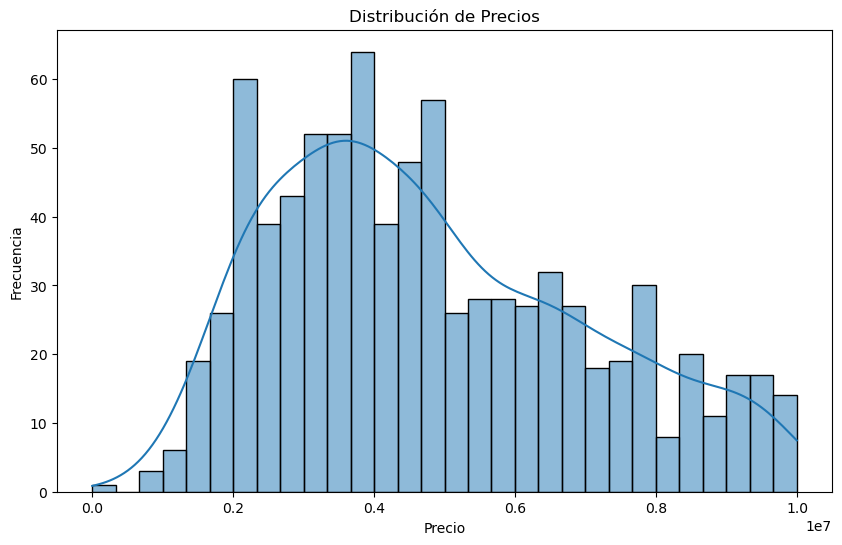

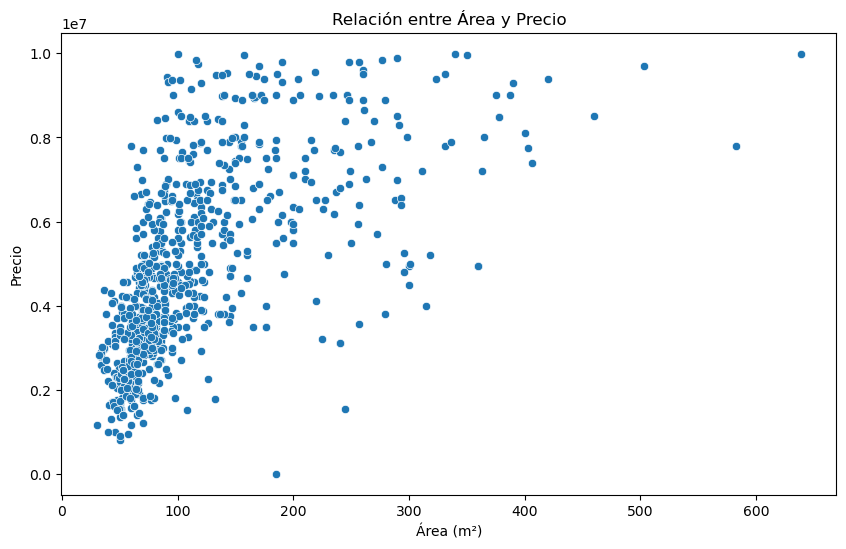

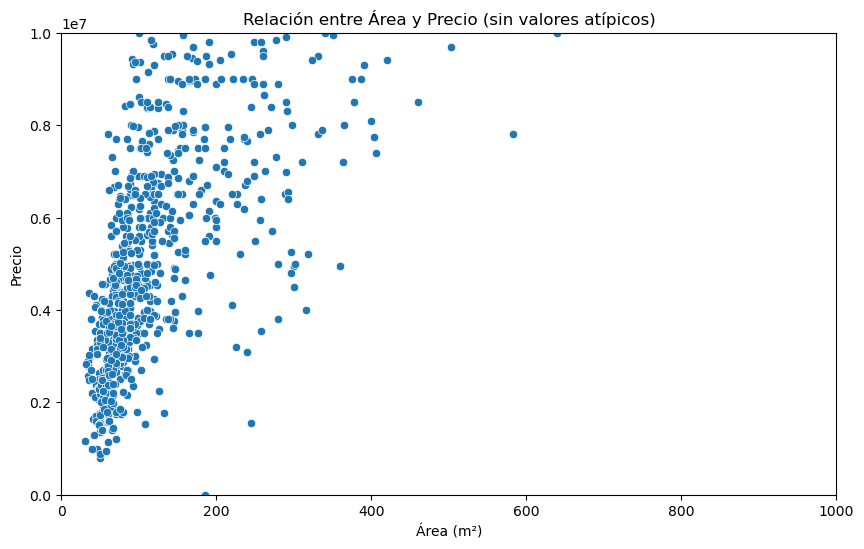

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos limpios
df = pd.read_csv('departamentos_cdmx_clean.csv')

# Eliminar valores atípicos para una mejor visualización
# Por ejemplo, eliminar precios mayores a 10 millones de pesos y áreas mayores a 1000 m²
df = df[df['price'] < 10000000]
df = df[df['area'] < 1000]

# Visualizar la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre área y precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Relación entre Área y Precio')
plt.xlabel('Área (m²)')
plt.ylabel('Precio')
plt.show()

# Para gráficos de dispersión con límites ajustados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Relación entre Área y Precio (sin valores atípicos)')
plt.xlabel('Área (m²)')
plt.ylabel('Precio')
plt.xlim(0, 1000)  # Limitar el rango del eje x
plt.ylim(0, 10000000)  # Limitar el rango del eje y
plt.show()

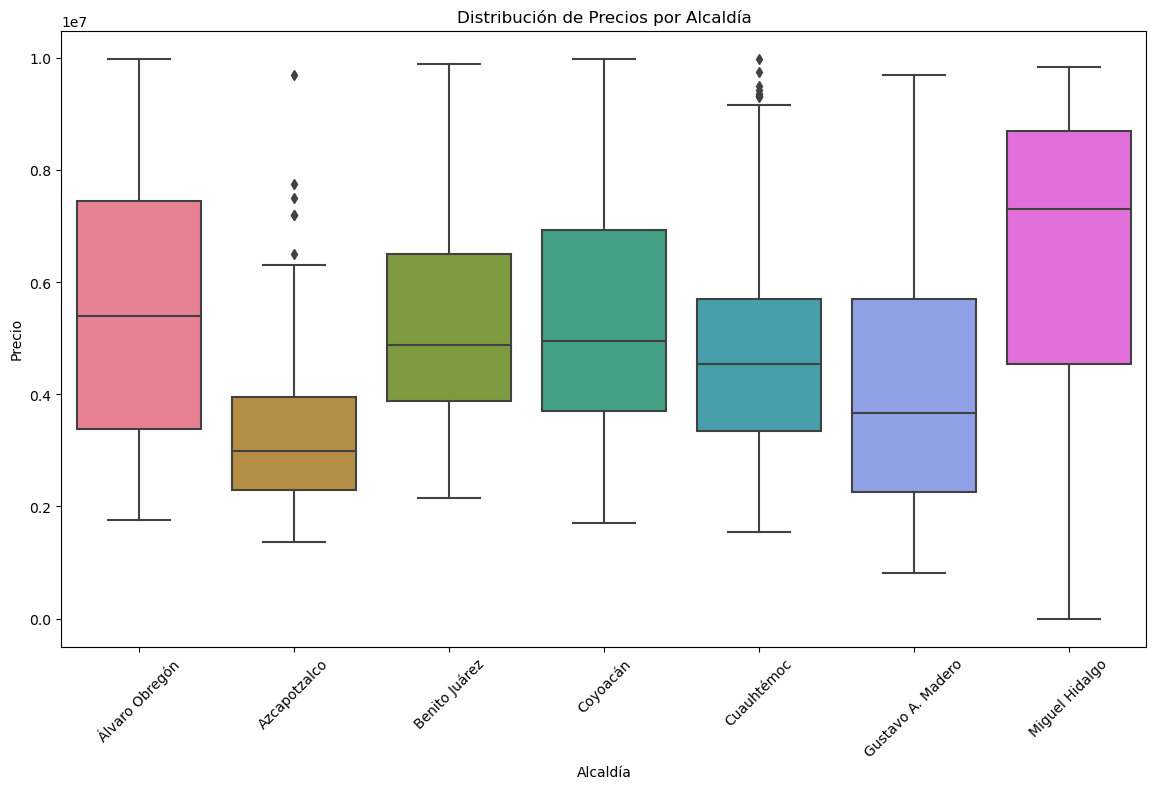

In [12]:
palette = sns.color_palette("husl", len(df['alcaldia'].unique()))
alcaldia_colors = {alcaldia: color for alcaldia, color in zip(df['alcaldia'].unique(), palette)}

plt.figure(figsize=(14, 8))
sns.boxplot(x='alcaldia', y='price', data=df, palette=alcaldia_colors)
plt.title('Distribución de Precios por Alcaldía')
plt.xlabel('Alcaldía')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()


# Modelado y Entrenamiento de Machine Learning

Primero importaremos algunas bibliotecas necesarias para la creación de modelos

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
import matplotlib.pyplot as plt

Cargamos alguno de los datos y seleccionamos las características para los entrenamientos

In [14]:
# Cargar los datos limpios
df = pd.read_csv('departamentos_cdmx_clean.csv')

# Eliminar valores atípicos para una mejor visualización
df = df[df['price'] < 10000000]
df = df[df['area'] < 1000]

# Convertir variables categóricas a numéricas (dummy variables)
df = pd.get_dummies(df, columns=['alcaldia'], drop_first=True)

# Seleccionar características y variable objetivo
X = df.drop(columns=['price', 'title', 'location', 'description'])
y = df['price']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creamos un modelo de regresión lineal para la predicción de los precios de las viviendas

In [15]:
# 1. Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}\n")

Linear Regression:
MAE: 1163805.0436482753
MSE: 2242484865964.744
R²: 0.5554952755669923



Creamos un segundo modelo utilizando Random Forest

In [16]:
# 2. Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}\n")

Random Forest:
MAE: 944759.9651673168
MSE: 1710891593906.5164
R²: 0.6608675456291253



Creamos un tercer modelo usando Gradient Boosting

In [17]:
# 3. Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gb)}")
print(f"R²: {r2_score(y_test, y_pred_gb)}\n")

Gradient Boosting:
MAE: 933478.1060446423
MSE: 1489466972225.3857
R²: 0.704758272356822



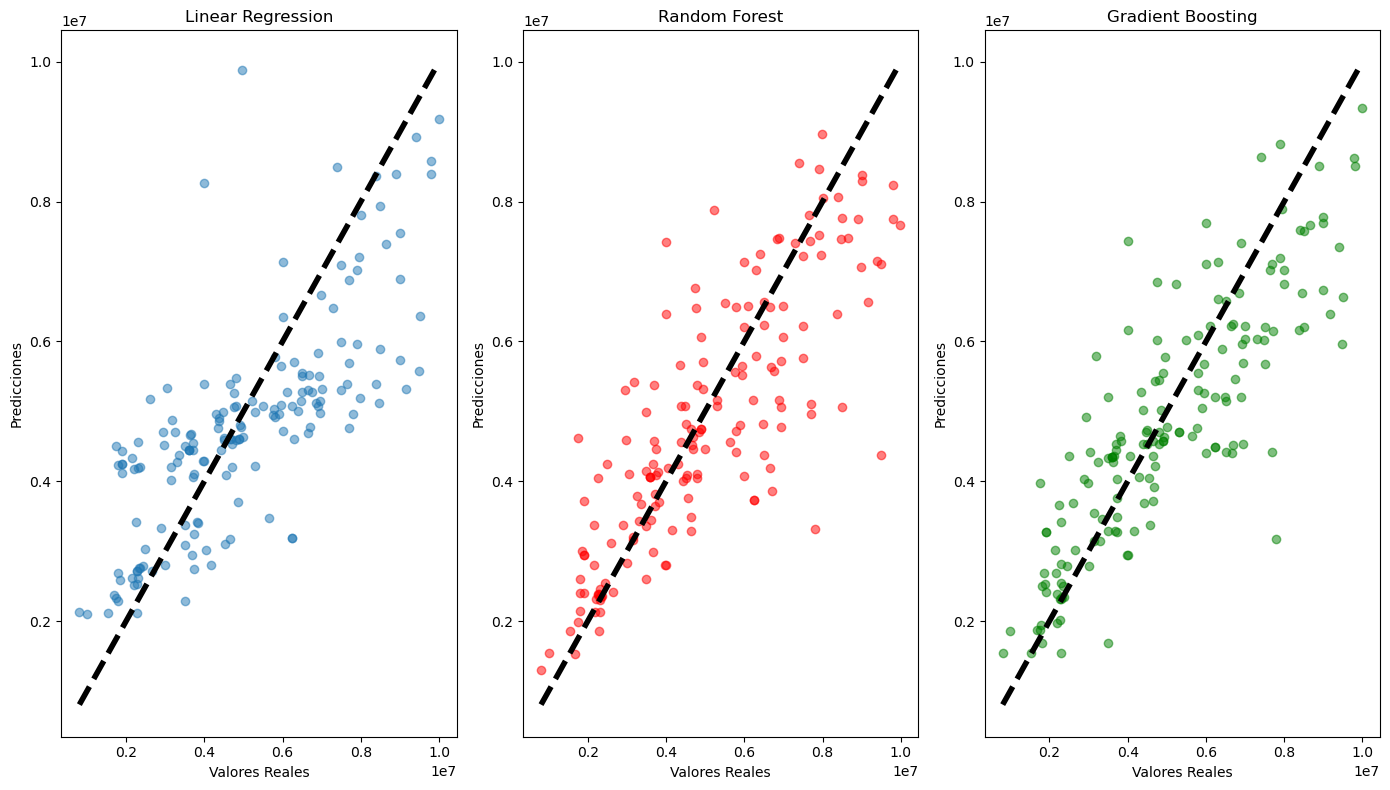

In [23]:
# Predicciones de los modelos
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Gráfica de dispersión de los valores reales frente a las predicciones
plt.figure(figsize=(14, 8))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Linear Regression')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Random Forest')

# Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gradient Boosting')

plt.tight_layout()
plt.show()


Tras analizar los 3 modelos de predicción seleccionamos el modelo Gradient Boosting como el mejor modelo de los que se entrenaron

In [21]:
# Seleccionar el mejor modelo basado en el rendimiento
best_model = gb

# Evaluación del Modelo

Evaluamos el rendimiento del modelo seleccionado utilizando métricas como MAE, MSE, RMSE y R². Y procedemos a guardar el modelo entrenando para futuras predicciones.

In [22]:
# Realizar predicciones con el mejor modelo
final_predictions = best_model.predict(X_test)

# Evaluar el rendimiento final del modelo
print("Final Model Performance:")
print(f"MAE: {mean_absolute_error(y_test, final_predictions)}")
print(f"MSE: {mean_squared_error(y_test, final_predictions)}")
print(f"R²: {r2_score(y_test, final_predictions)}")

# Guardar el modelo entrenado para su uso futuro

joblib.dump(best_model, 'best_model.pkl')

Final Model Performance:
MAE: 933478.1060446423
MSE: 1489466972225.3857
R²: 0.704758272356822


['best_model.pkl']

# Predicción con Nuevos Datos

Creamos una función para predecir los precios de nuevas propiedades utilizando el modelo entrenado. En el siguiente ejemplo se esta prediciendo el valor de una vivienda de 100 metros cuadrados con 3 recámaras, 2 baños y localizado en la álcaldia de Coyoacán.

In [20]:
import joblib
import pandas as pd

# Cargar el modelo entrenado
model = joblib.load('best_model.pkl')

# Obtener las características utilizadas durante el entrenamiento
feature_names = model.feature_names_in_

# Definir las características de entrada para la nueva propiedad
def predict_price(area, bedrooms, bathrooms, alcaldia):
    # Crear un DataFrame con las características de la nueva propiedad
    data = {
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
    }

    # Crear columnas dummy para las alcaldías
    alcaldias = [col for col in feature_names if 'alcaldia_' in col]

    for alc in alcaldias:
        data[alc] = [1 if alc == f'alcaldia_{alcaldia}' else 0]

    # Convertir el diccionario a un DataFrame
    input_df = pd.DataFrame(data)

    # Asegurarse de que las columnas están en el mismo orden que las usadas en el entrenamiento
    input_df = input_df[feature_names]

    # Realizar la predicción
    predicted_price = model.predict(input_df)

    return predicted_price[0]

# Ejemplo de uso de la función
predicted_price = predict_price(100, 3, 2, 'Coyoacán')# La función recibe parametros como Metros cuadrados, Numero de habitacion, numero de baños y alcaldía
print(f'El precio predicho para la propiedad es: ${predicted_price:.2f}')


El precio predicho para la propiedad es: $4498618.86


# Conclusiones

En este proyecto, se desarrolló un modelo predictivo para los precios de propiedades en la Ciudad de México utilizando varias técnicas de Machine Learning. Se realizaron análisis exploratorios para entender mejor los datos y se probaron diferentes modelos para seleccionar el que mejor rendimiento ofrecía. Finalmente, creamos una función para predecir precios de nuevas propiedades basándonos en el modelo entrenado.

### Posibles Mejoras
1. **Incrementar el tamaño del conjunto de datos:** Obtener más datos de otras fuentes para mejorar la precisión del modelo.
2. **Incluir más características:** Agregar más variables que puedan influir en el precio de las propiedades, como la cercanía a servicios, año de construcción, etc.
3. **Optimización de hiperparámetros:** Realizar una búsqueda más exhaustiva de los hiperparámetros para mejorar el rendimiento de los modelos.

Espero que este análisis y modelo predictivo sean útiles para la toma de decisiones en el mercado inmobiliario de la Ciudad de México.
